In [12]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [13]:
url ='https://channeli.in/api/django_filemanager/media_files/12069/'
myImg = io.imread(url)

[[207. 207. 207. ... 244. 244. 244.]
 [207. 207. 208. ... 244. 244. 244.]
 [208. 208. 208. ... 244. 244. 244.]
 ...
 [201. 206. 210. ... 120. 120. 120.]
 [199. 204. 209. ... 121. 121. 120.]
 [191. 197. 202. ... 122. 121. 120.]]
(720, 960)


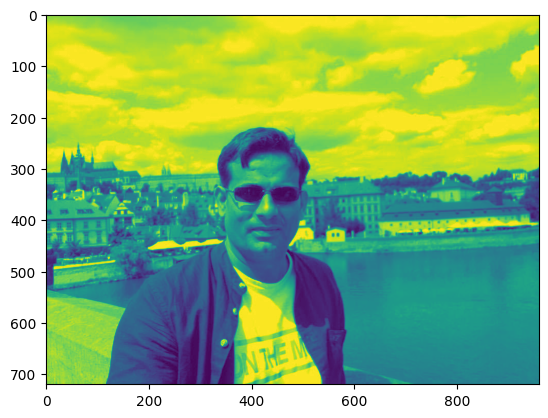

In [14]:
gray_image = cv.cvtColor(myImg,cv.COLOR_BGR2GRAY)
img_mat=np.array(list(gray_image),float)
print(img_mat)
print(img_mat.shape)
plt.imshow(img_mat)

In [15]:
img_mat_scaled =(img_mat-img_mat.mean())/img_mat.std()

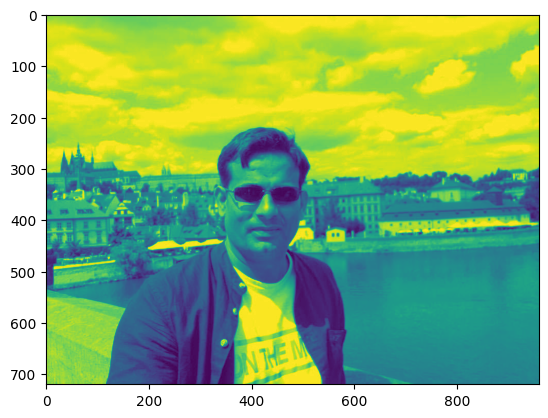

In [16]:
plt.imshow(img_mat_scaled)

In [17]:
u ,s,vh=np.linalg.svd(img_mat_scaled)

In [18]:
s

array([6.39522571e+02, 3.44350124e+02, 2.07081085e+02, 1.57439119e+02,
       1.25787845e+02, 1.20865004e+02, 8.68887716e+01, 8.05757595e+01,
       6.75708038e+01, 6.29380063e+01, 5.97459046e+01, 5.85076205e+01,
       5.28371849e+01, 5.02581216e+01, 4.63148098e+01, 4.54543869e+01,
       4.25603685e+01, 4.19150225e+01, 3.74458923e+01, 3.70756507e+01,
       3.49787847e+01, 3.44789549e+01, 3.42939104e+01, 3.17943286e+01,
       2.94838963e+01, 2.71703927e+01, 2.54969451e+01, 2.51410632e+01,
       2.42882316e+01, 2.39045285e+01, 2.29152099e+01, 2.22767171e+01,
       2.17357293e+01, 2.15750722e+01, 2.07105293e+01, 2.05700828e+01,
       1.95443396e+01, 1.89511849e+01, 1.85638707e+01, 1.75033840e+01,
       1.71612230e+01, 1.70968433e+01, 1.67423011e+01, 1.61668124e+01,
       1.54620698e+01, 1.51071139e+01, 1.45057282e+01, 1.42059453e+01,
       1.41169286e+01, 1.39023061e+01, 1.34001676e+01, 1.29271988e+01,
       1.26690652e+01, 1.22470989e+01, 1.20545851e+01, 1.18928915e+01,
      

In [19]:
s.sum()

3887.3137341067563

In [27]:
total=0
count=0
l=[]

for i in s:


  if total/s.sum() >=0.90:
    break
  else:
    pass
  l.append(i)
  total += i
  count+=1


In [28]:
sd=np.diag(np.array(l))

In [29]:
sd.shape

(114, 114)

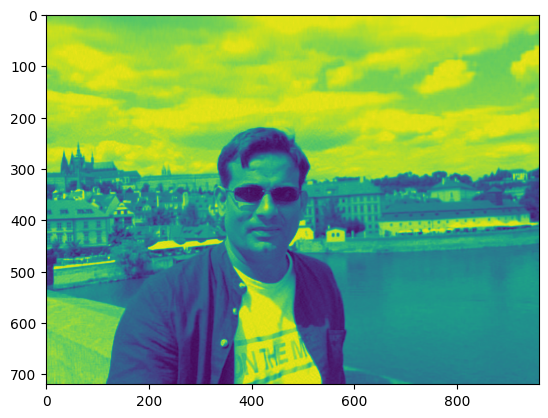

In [30]:
b=np.zeros((img_mat.shape[0],img_mat.shape[1]))
b[0:sd.shape[0],0:sd.shape[1]]=sd
sigma=b
Image=np.dot(np.dot(u,sigma),vh)
plt.imshow(Image)